In [4]:
#Import libraries
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#load dataset 
df=pd.read_csv('Customer_Segmentation.csv')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
def missing_value_percentages(df):
    missing_percent = df.isnull().mean() * 100
    missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)
    
    print("Missing Value Percentage per Feature:\n")
    print(missing_summary.round(2).astype(str) + " %")
    
    return missing_summary

missing_summary=missing_value_percentages(df)
missing_summary

Missing Value Percentage per Feature:

Income    1.07 %
dtype: object


Income    1.071429
dtype: float64

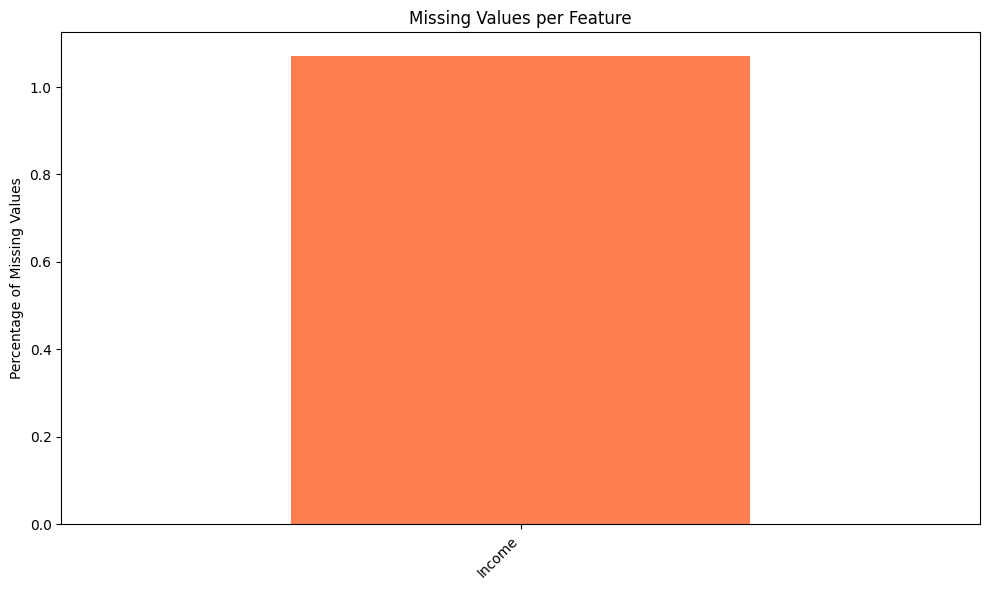

In [9]:
def plot_missing_percentages(df):
    missing_percent = df.isnull().mean() * 100
    missing = missing_percent[missing_percent > 0].sort_values(ascending=False)

    if missing.empty:
        print("No missing values to visualize.")
        return

    plt.figure(figsize=(10, 6))
    missing.plot(kind='bar', color='coral')
    plt.ylabel("Percentage of Missing Values")
    plt.title("Missing Values per Feature")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_missing_percentages(df)


In [10]:
columns=['Income']

for col in columns:
    df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipykernel_4822/660653333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [13]:
df.to_csv('Customer_Segmentation_cleaned.csv')

In [14]:
#Working with wrong formats and data types
df2=pd.read_csv('Customer_Segmentation_cleaned.csv')


In [15]:
# Function to plot a histogram for a specified column in a DataFrame
def plot_histogram(df, column_name, bins="auto", title=None, xlabel=None, ylabel="Frequency", figsize=(10, 6)):
    """
    Plots a histogram for a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to plot.
        bins (int or str): Number of bins for the histogram, or "auto" for automatic binning.
                           Defaults to "auto".
        title (str, optional): Title of the plot. Defaults to "Histogram of [column_name]".
        xlabel (str, optional): Label for the x-axis. Defaults to column_name.
        ylabel (str, optional): Label for the y-axis. Defaults to "Frequency".
        figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (10, 6).
        save_path (str, optional): Path to save the plot (e.g., "histogram_income.png").
                                   If None, the plot is displayed.
    """
    if column_name not in df.columns:
        print(f"Error: Column \'{column_name}\' not found in the DataFrame.")
        return

    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=column_name, bins=bins, kde=True) # kde=True adds a density curve

    # Set titles and labels
    if title is None:
        plt.title(f"Histogram of {column_name}")
    else:
        plt.title(title)

    if xlabel is None:
        plt.xlabel(column_name)
    else:
        plt.xlabel(xlabel)

    plt.ylabel(ylabel)

    
    plt.show()





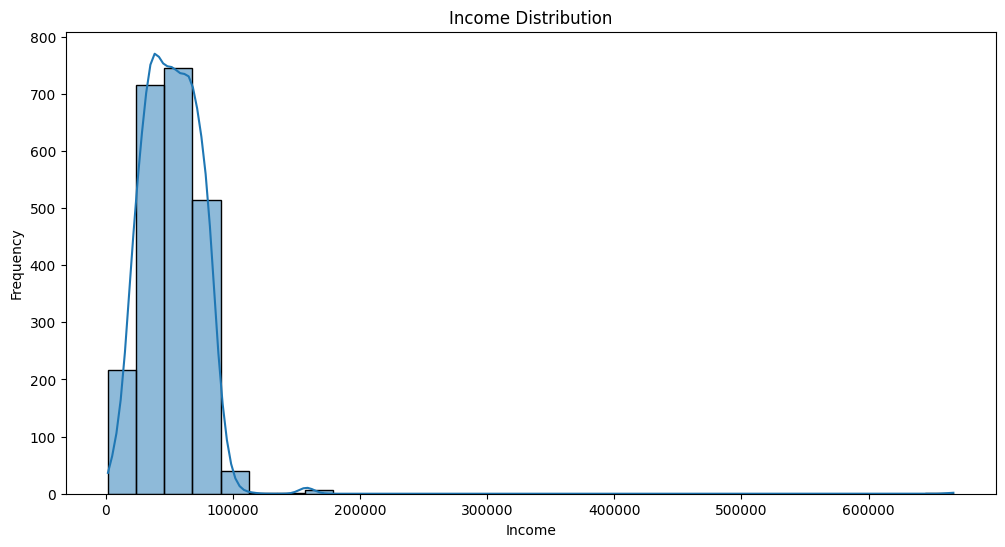

In [16]:
plot_histogram(df2, 'Income', bins=30, title='Income Distribution', xlabel='Income', ylabel='Frequency', figsize=(12, 6))

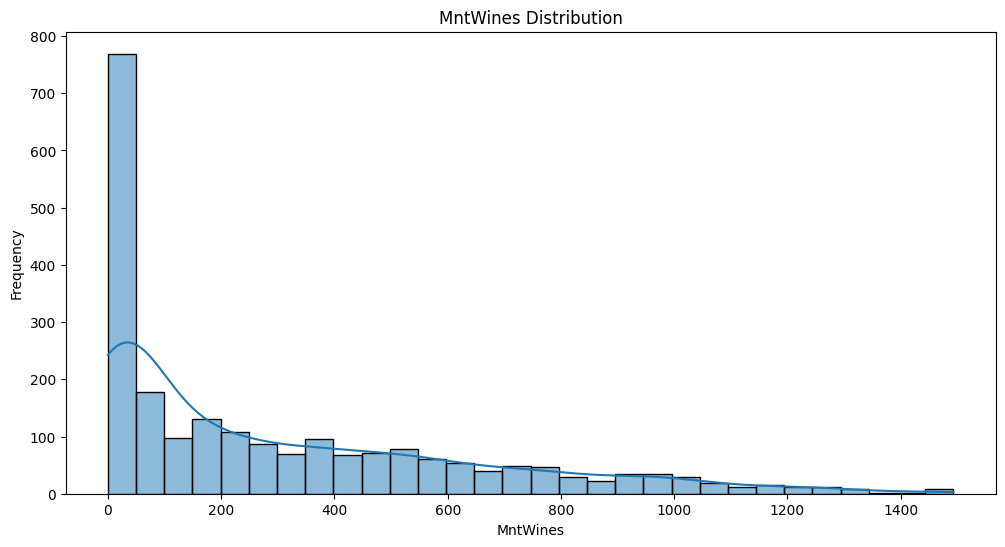

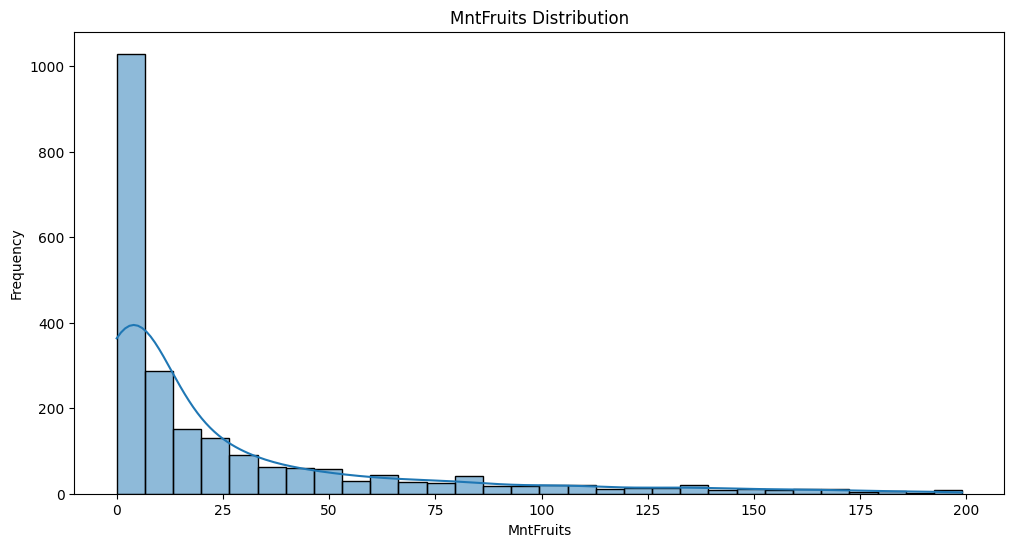

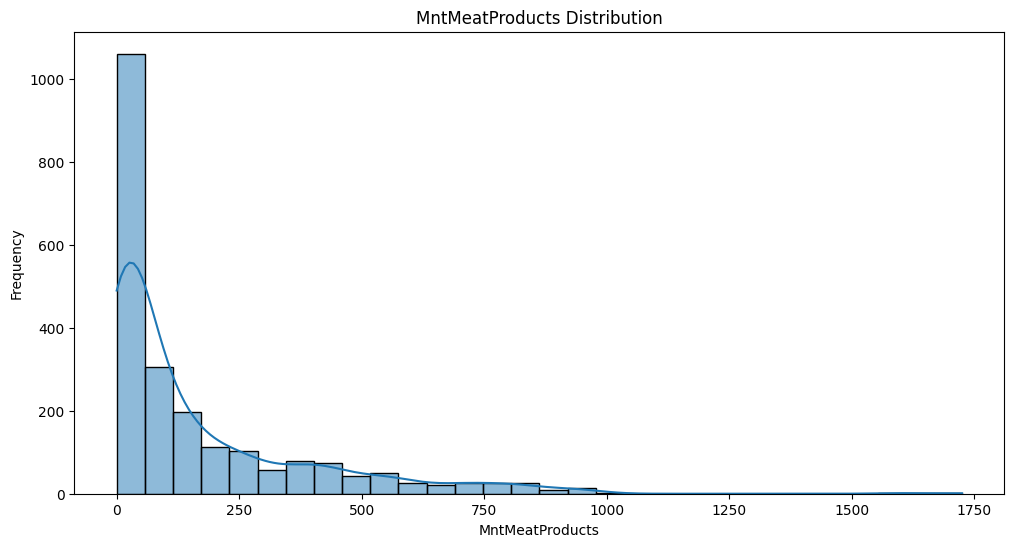

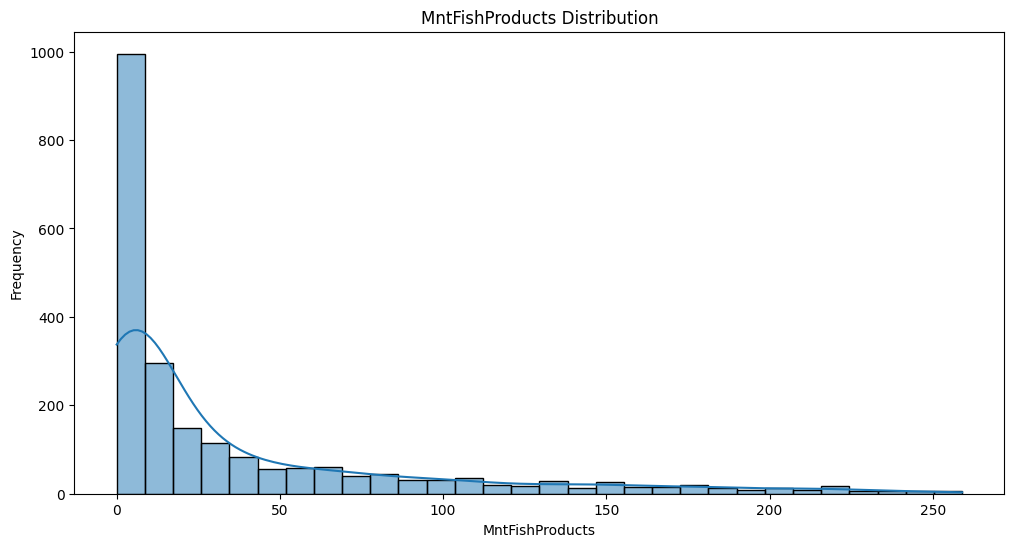

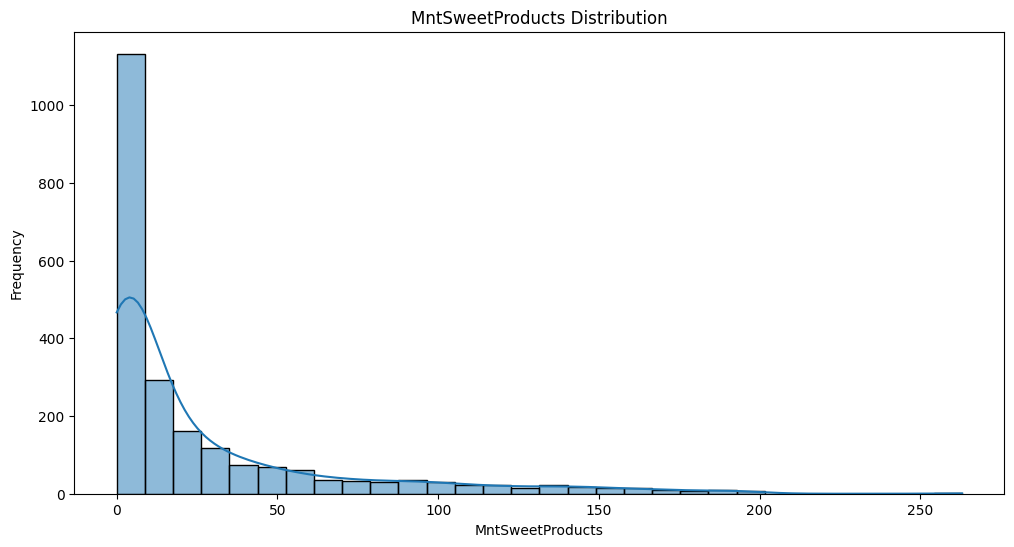

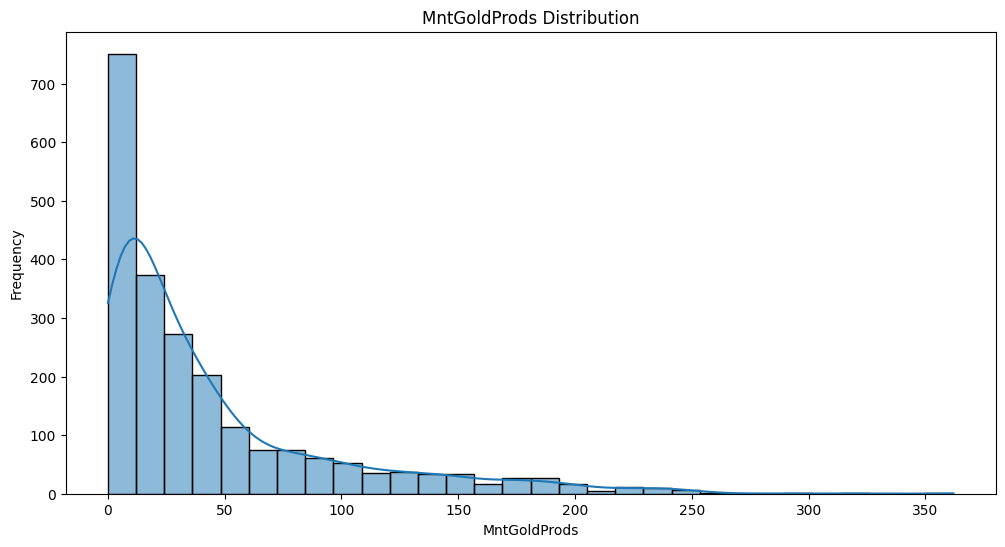

In [24]:
spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

for col in spending_cols:
    plot_histogram(df2, col, bins=30, title=f'{col} Distribution', xlabel=col, ylabel='Frequency', figsize=(12, 6))

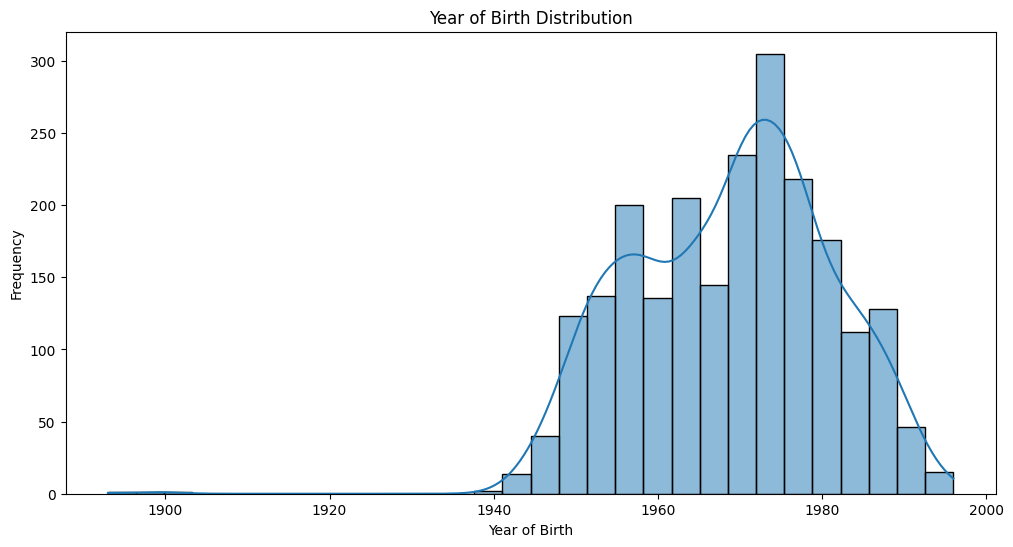

In [25]:
plot_histogram(df2,column_name='Year_Birth', bins=30, title='Year of Birth Distribution', xlabel='Year of Birth', ylabel='Frequency', figsize=(12, 6))

In [26]:
#fEATURE ENGINEERING

from datetime import datetime

# 1. Create Age
# Assuming the current year is 2025 for consistency with previous responses
CURRENT_YEAR = 2025
df2['Age'] = CURRENT_YEAR - df2['Year_Birth']

# 2. Create Customer_Tenure
# Convert 'Dt_Customer' to datetime objects
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y')


most_recent_date = df2['Dt_Customer'].max()

# Calculate tenure in days
df2['Customer_Tenure'] = (most_recent_date - df2['Dt_Customer']).dt.days

# Create Total_Spending
spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]
df2['Total_Spending'] = df2[spending_cols].sum(axis=1)

# 4. Create Total_Purchases
purchase_cols = [
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]
df2['Total_Purchases'] = df2[purchase_cols].sum(axis=1)

df2['Total_Children'] = df2['Kidhome'] + df2['Teenhome']


print(df2.head(5))


   Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  ...  Complain  Z_CostContact  Z_Revenue  \
0         0  2012-09-04       58  ...         0              3         11   
1         1  2014-03-08       38  ...         0              3         11   
2         0  2013-08-21       26  ...         0              3         11   
3         0  2014-02-10       26  ...         0              3         11   
4         0  2014-01-19       94  ...         0              3         11   

   Response  Age  Customer_Tenure  Total_Spending  Total

In [18]:

# Define the mapping for simplification
marital_status_simplification = {
    'Married': 'In a Relationship',
    'Together': 'In a Relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

# Apply the mapping to the 'Marital_Status' column and create a new column 'Marital_Status_Simplified'
df2['Marital_Status_Simplified'] = df2['Marital_Status'].replace(marital_status_simplification)

# Display the first few rows with the new column to verify
print(df2[['Marital_Status', 'Marital_Status_Simplified']].head())

# Print the value counts of the new simplified column for your entire df2
print('\nValue counts of the new simplified column:')
print(df2['Marital_Status_Simplified'].value_counts())


  Marital_Status Marital_Status_Simplified
0         Single                    Single
1         Single                    Single
2       Together         In a Relationship
3       Together         In a Relationship
4        Married         In a Relationship

Value counts of the new simplified column:
Marital_Status_Simplified
In a Relationship    1444
Single                796
Name: count, dtype: int64


Lower Bound: 1932.0
Upper Bound: 2004.0

Outlier Records:
        ID  Year_Birth
192   7829        1900
239  11004        1893
339   1150        1899


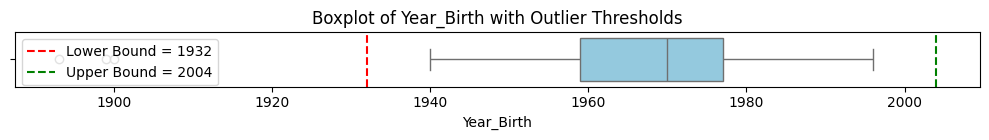

In [19]:
# Step 1: Calculate IQR boundaries
Q1 = df2['Year_Birth'].quantile(0.25)
Q3 = df2['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Filter outliers
outliers = df2[(df2['Year_Birth'] < lower_bound) | (df2['Year_Birth'] > upper_bound)]

# Step 3: Display the outliers
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("\nOutlier Records:")
print(outliers[['ID', 'Year_Birth']])

# Step 4: Visualize with a boxplot
plt.figure(figsize=(10, 1.5))
sns.boxplot(x=df['Year_Birth'], color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound = {int(lower_bound)}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound = {int(upper_bound)}')
plt.title("Boxplot of Year_Birth with Outlier Thresholds")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# Remove outliers if you're ready
column = 'Year_Birth'


df_no_outliers = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
df2.shape, df_no_outliers.shape

((2240, 35), (2237, 35))

In [21]:


def detect_outliers_iqr(df, column):
    # Step 1: Calculate IQR boundaries
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 2: Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Step 3: Print results
    print(f"Outlier Detection for: {column}")
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    print(f"\nNumber of outliers: {len(outliers)}")
    print("Outlier Records (First 5):")
    print(outliers[['ID', column]].head())  # You can remove 'ID' if not in your df

    # Step 4: Visualize with a boxplot
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df[column], color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound = {int(lower_bound)}')
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound = {int(upper_bound)}')
    plt.title(f"Boxplot of {column} with Outlier Thresholds")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return outliers



Analyzing column: Unnamed: 0
Outlier Detection for: Unnamed: 0
Lower Bound: -1119.5
Upper Bound: 3358.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Unnamed: 0]
Index: []


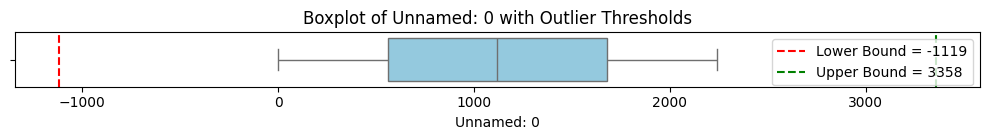


Analyzing column: ID
Outlier Detection for: ID
Lower Bound: -5571.0
Upper Bound: 16827.0

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, ID]
Index: []


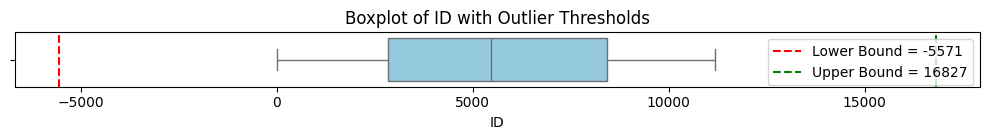


Analyzing column: Year_Birth
Outlier Detection for: Year_Birth
Lower Bound: 1932.0
Upper Bound: 2004.0

Number of outliers: 3
Outlier Records (First 5):
        ID  Year_Birth
192   7829        1900
239  11004        1893
339   1150        1899


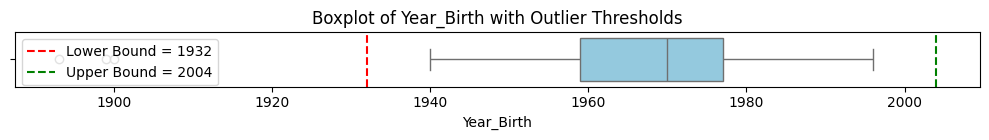


Analyzing column: Income
Outlier Detection for: Income
Lower Bound: -13587.75
Upper Bound: 117416.25

Number of outliers: 8
Outlier Records (First 5):
        ID    Income
164   8475  157243.0
617   1503  162397.0
655   5555  153924.0
687   1501  160803.0
1300  5336  157733.0


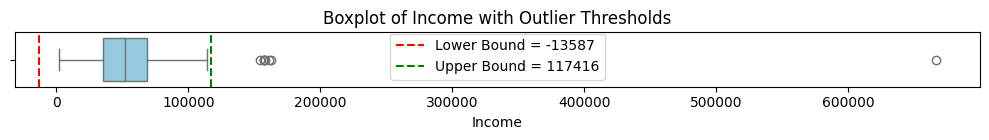


Analyzing column: Kidhome
Outlier Detection for: Kidhome
Lower Bound: -1.5
Upper Bound: 2.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Kidhome]
Index: []


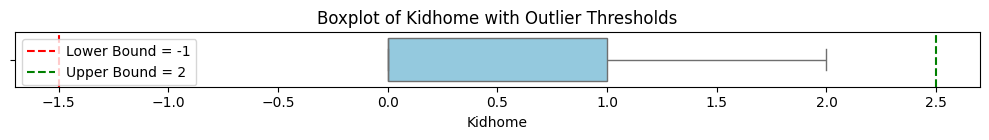


Analyzing column: Teenhome
Outlier Detection for: Teenhome
Lower Bound: -1.5
Upper Bound: 2.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Teenhome]
Index: []


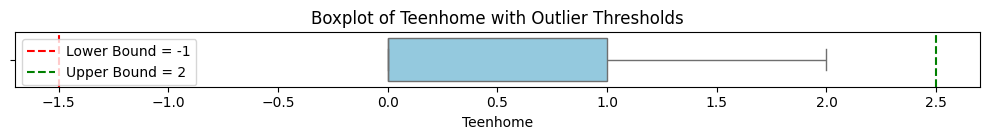


Analyzing column: Recency
Outlier Detection for: Recency
Lower Bound: -51.0
Upper Bound: 149.0

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Recency]
Index: []


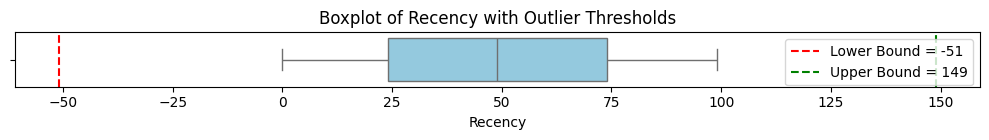


Analyzing column: MntWines
Outlier Detection for: MntWines
Lower Bound: -697.0
Upper Bound: 1225.0

Number of outliers: 35
Outlier Records (First 5):
       ID  MntWines
111  7431      1332
161  9260      1349
295  2926      1241
424  6932      1285
430  3725      1248


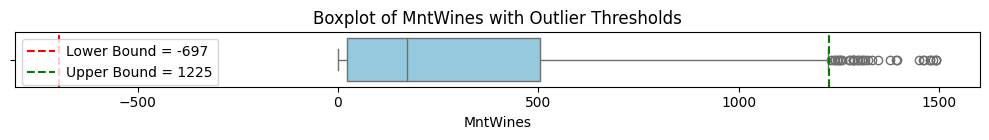


Analyzing column: MntFruits
Outlier Detection for: MntFruits
Lower Bound: -47.0
Upper Bound: 81.0

Number of outliers: 227
Outlier Records (First 5):
      ID  MntFruits
0   5524         88
29  1966        100
45  1371        164
53  2225        120
72  6312        107


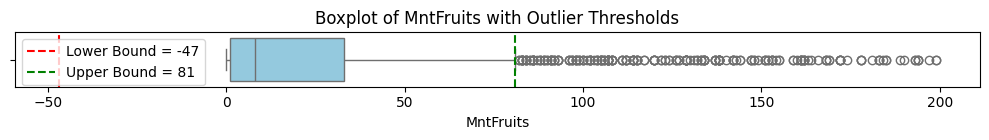


Analyzing column: MntMeatProducts
Outlier Detection for: MntMeatProducts
Lower Bound: -308.0
Upper Bound: 556.0

Number of outliers: 175
Outlier Records (First 5):
      ID  MntMeatProducts
21  5376             1725
29  1966              801
51  4114              780
76  1859              925
77  7503              779


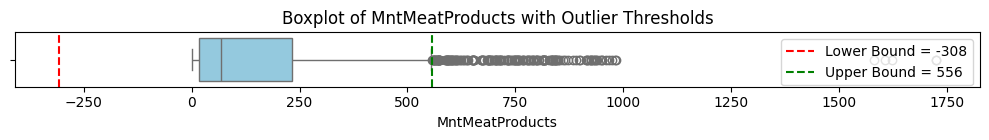


Analyzing column: MntFishProducts
Outlier Detection for: MntFishProducts
Lower Bound: -67.5
Upper Bound: 120.5

Number of outliers: 223
Outlier Records (First 5):
      ID  MntFishProducts
0   5524              172
12  2125              225
17  4939              150
39  2968              160
45  1371              227


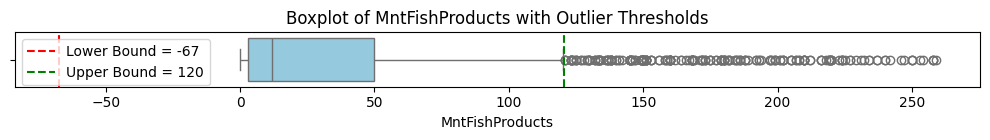


Analyzing column: MntSweetProducts
Outlier Detection for: MntSweetProducts
Lower Bound: -47.0
Upper Bound: 81.0

Number of outliers: 248
Outlier Records (First 5):
      ID  MntSweetProducts
0   5524                88
12  2125               112
27  5255               263
40  8601               178
51  4114               167


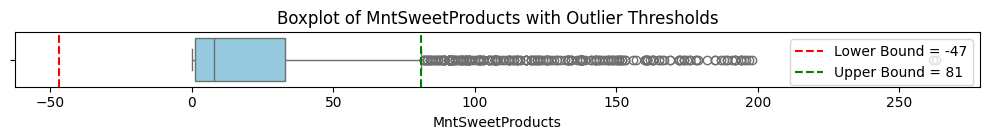


Analyzing column: MntGoldProds
Outlier Detection for: MntGoldProds
Lower Bound: -61.5
Upper Bound: 126.5

Number of outliers: 207
Outlier Records (First 5):
      ID  MntGoldProds
18  6565           176
27  5255           362
45  1371           174
53  2225           241
55  6260           190


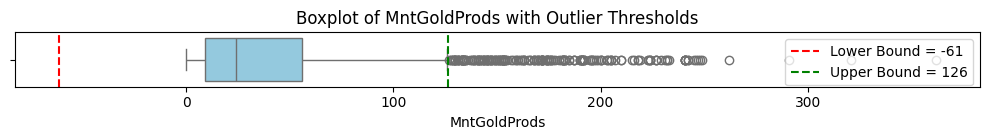


Analyzing column: NumDealsPurchases
Outlier Detection for: NumDealsPurchases
Lower Bound: -2.0
Upper Bound: 6.0

Number of outliers: 86
Outlier Records (First 5):
      ID  NumDealsPurchases
21  5376                 15
24  1409                  7
49  6566                  9
54  9381                  7
69  1357                  7


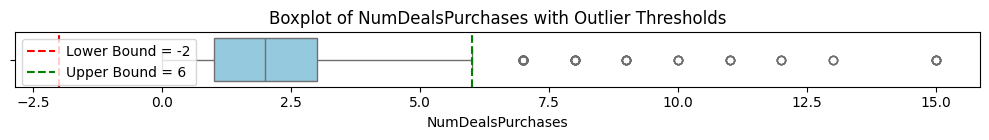


Analyzing column: NumWebPurchases
Outlier Detection for: NumWebPurchases
Lower Bound: -4.0
Upper Bound: 12.0

Number of outliers: 4
Outlier Records (First 5):
         ID  NumWebPurchases
27     5255               27
1806   6237               23
1898   4619               27
1975  10311               25


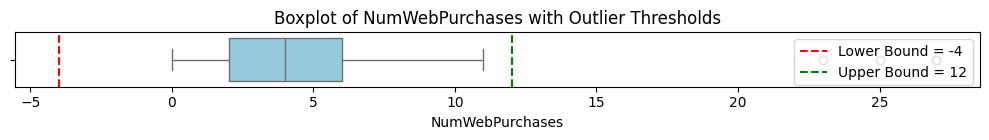


Analyzing column: NumCatalogPurchases
Outlier Detection for: NumCatalogPurchases
Lower Bound: -6.0
Upper Bound: 10.0

Number of outliers: 23
Outlier Records (First 5):
        ID  NumCatalogPurchases
21    5376                   28
104   8908                   11
164   8475                   22
288  10102                   11
586   9058                   11


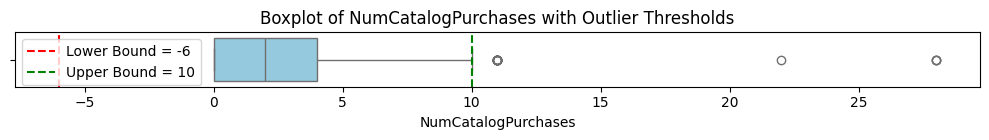


Analyzing column: NumStorePurchases
Outlier Detection for: NumStorePurchases
Lower Bound: -4.5
Upper Bound: 15.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, NumStorePurchases]
Index: []


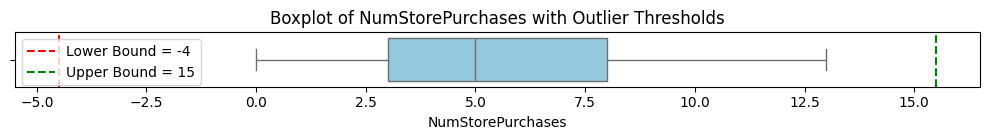


Analyzing column: NumWebVisitsMonth
Outlier Detection for: NumWebVisitsMonth
Lower Bound: -3.0
Upper Bound: 13.0

Number of outliers: 8
Outlier Records (First 5):
         ID  NumWebVisitsMonth
9      5899                 20
774    4303                 20
981    3955                 14
1042  10749                 19
1245   6862                 20


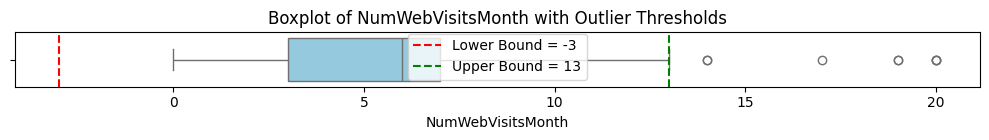

Skipping column 'AcceptedCmp3' (only 2 unique value(s))
Skipping column 'AcceptedCmp4' (only 2 unique value(s))
Skipping column 'AcceptedCmp5' (only 2 unique value(s))
Skipping column 'AcceptedCmp1' (only 2 unique value(s))
Skipping column 'AcceptedCmp2' (only 2 unique value(s))
Skipping column 'Complain' (only 2 unique value(s))
Skipping column 'Z_CostContact' (only 1 unique value(s))
Skipping column 'Z_Revenue' (only 1 unique value(s))
Skipping column 'Response' (only 2 unique value(s))

Analyzing column: Age
Outlier Detection for: Age
Lower Bound: 21.0
Upper Bound: 93.0

Number of outliers: 3
Outlier Records (First 5):
        ID  Age
192   7829  125
239  11004  132
339   1150  126


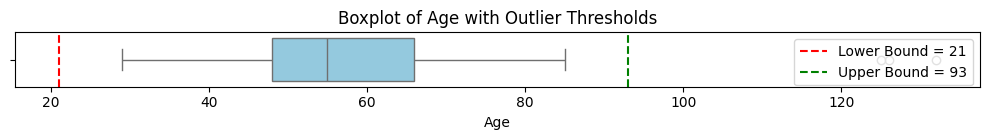


Analyzing column: Customer_Tenure
Outlier Detection for: Customer_Tenure
Lower Bound: -341.625
Upper Bound: 1051.375

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Customer_Tenure]
Index: []


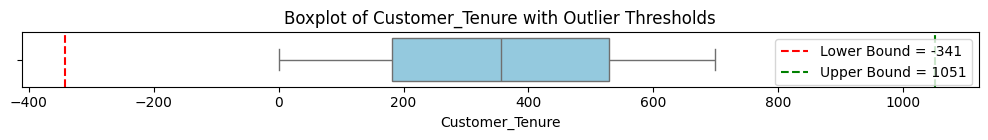


Analyzing column: Total_Spending
Outlier Detection for: Total_Spending
Lower Bound: -1396.375
Upper Bound: 2510.625

Number of outliers: 3
Outlier Records (First 5):
        ID  Total_Spending
1179  5735            2525
1492  1763            2524
1572  5350            2525


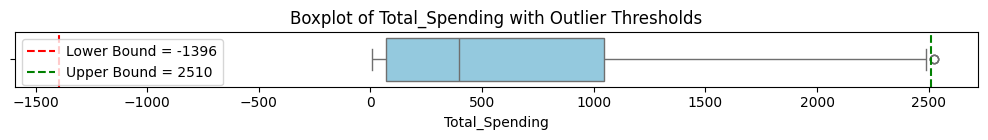


Analyzing column: Total_Purchases
Outlier Detection for: Total_Purchases
Lower Bound: -11.5
Upper Bound: 40.5

Number of outliers: 2
Outlier Records (First 5):
       ID  Total_Purchases
21   5376               43
687  1501               44


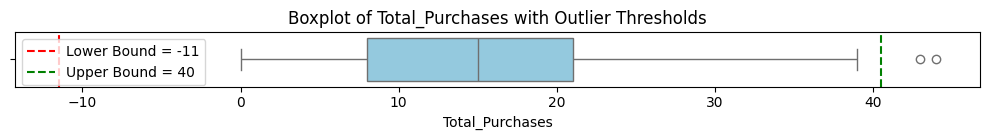

In [22]:
for col in df2.select_dtypes(include='number').columns:
    unique_vals = df2[col].nunique()
    
    if unique_vals <= 2:
        print(f"Skipping column '{col}' (only {unique_vals} unique value(s))")
        continue
    
    print(f"\nAnalyzing column: {col}")
    detect_outliers_iqr(df2, col)


In [23]:
#Removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter: keep only rows within bounds
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

    print(f"Removed {df.shape[0] - cleaned_df.shape[0]} outliers from column '{column}'")
    return cleaned_df
